<a href="https://colab.research.google.com/github/abhiverma112/Cat_-_Dog/blob/main/Cats_vs_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:37<00:00, 32.3MB/s]
100% 1.06G/1.06G [00:37<00:00, 30.5MB/s]


In [5]:
!mkdir  -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [9]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels= 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels= 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
# Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

  train_ds = train_ds.map(process)
  validation_ds = validation_ds.map(process)

In [11]:
# Creat CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 32)      128       
 chNormalization)                                                
                                                        

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 67s 92ms/step - loss: 1.1050 - accuracy: 0.5750 - val_loss: 0.5981 - val_accuracy: 0.6950
Epoch 2/10
625/625 [==============================] - 56s 88ms/step - loss: 0.6146 - accuracy: 0.6515 - val_loss: 0.5603 - val_accuracy: 0.7256
Epoch 3/10
625/625 [==============================] - 58s 92ms/step - loss: 0.5446 - accuracy: 0.7132 - val_loss: 0.6122 - val_accuracy: 0.7010
Epoch 4/10
625/625 [==============================] - 56s 89ms/step - loss: 0.4832 - accuracy: 0.7480 - val_loss: 0.5202 - val_accuracy: 0.7732
Epoch 5/10
625/625 [==============================] - 58s 91ms/step - loss: 0.4213 - accuracy: 0.7846 - val_loss: 0.4732 - val_accuracy: 0.7712
Epoch 6/10
625/625 [==============================] - 57s 90ms/step - loss: 0.3754 - accuracy: 0.8049 - val_loss: 0.4815 - val_accuracy: 0.7816
Epoch 7/10
625/625 [==============================] - 55s 88ms/step - loss: 0.3288 - accuracy: 0.8324 - val_loss: 0.4681 - val_accuracy:

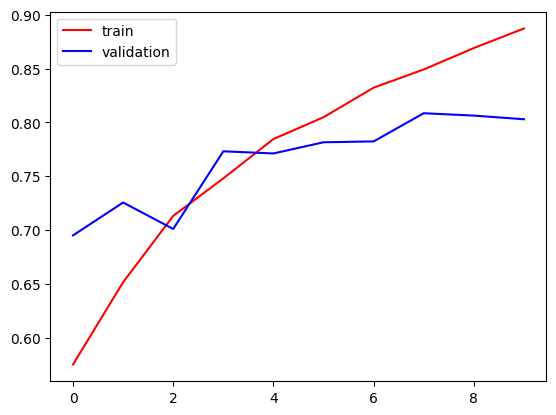

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

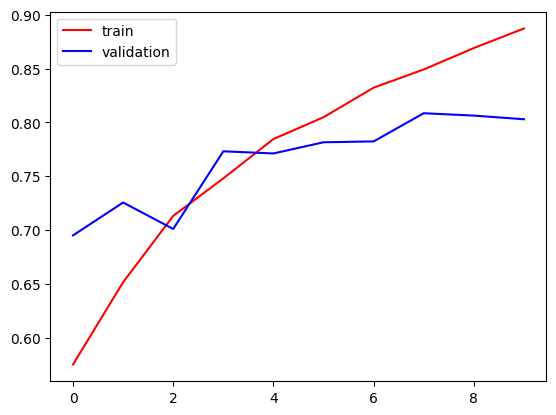

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

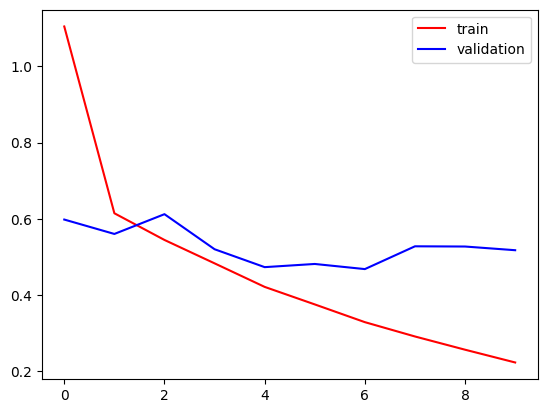

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


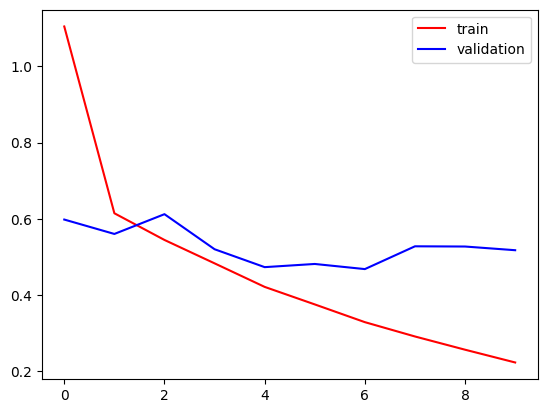

In [18]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [19]:
import cv2

In [20]:
test_img = cv2.imread('/content/dog.jpg')

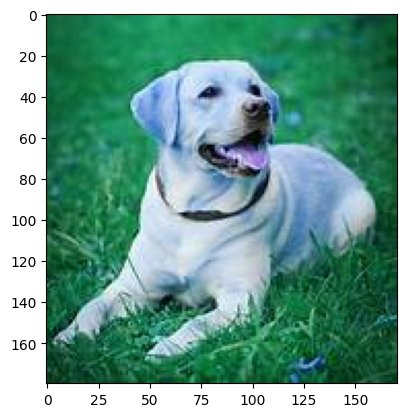

In [21]:
plt.imshow(test_img)

In [22]:
test_img.shape

(180, 171, 3)

In [23]:
test_img = cv2.resize(test_img,(256,256))

In [24]:
test_input = test_img.reshape((1,256,256,3))

In [25]:
model.predict(test_input)

1/1 [==============================] - 0s 366ms/step


array([[0.99967813]], dtype=float32)

In [26]:
test_img = cv2.imread('/content/cat.jpg')

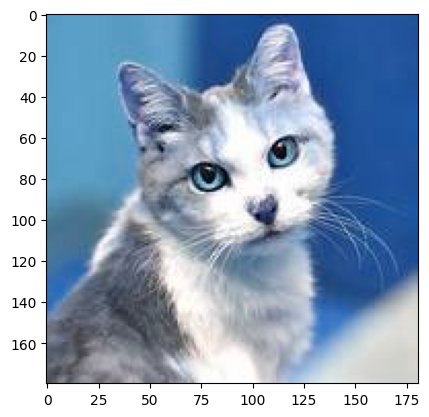

In [27]:
plt.imshow(test_img)

In [28]:
test_img.shape

(180, 181, 3)

In [29]:
test_img = cv2.resize(test_img,(256,256))

In [30]:
test_input = test_img.reshape((1,256,256,3))

In [31]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[0.14504355]], dtype=float32)